<a href="https://colab.research.google.com/github/ArwaAsiri/Affaq/blob/main/Segmentation_Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing packages
import pandas as pd
pd.set_option('display.float_format', '{:.4f}'.format)

import numpy as np
from numpy import where
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate



import matplotlib.pyplot as plt
from seaborn import load_dataset

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

In [ ]:
# reading data file
df = pd.read_csv('/content/CC GENERAL.csv')

In [ ]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.9007,0.8182,95.4000,0.0000,95.4000,0.0000,0.1667,0.0000,0.0833,0.0000,0,2,1000.0000,201.8021,139.5098,0.0000,12
1,C10002,3202.4674,0.9091,0.0000,0.0000,0.0000,6442.9455,0.0000,0.0000,0.0000,0.2500,4,0,7000.0000,4103.0326,1072.3402,0.2222,12
2,C10003,2495.1489,1.0000,773.1700,773.1700,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0,12,7500.0000,622.0667,627.2848,0.0000,12
3,C10004,1666.6705,0.6364,1499.0000,1499.0000,0.0000,205.7880,0.0833,0.0833,0.0000,0.0833,1,1,7500.0000,0.0000,NaN,0.0000,12
4,C10005,817.7143,1.0000,16.0000,16.0000,0.0000,0.0000,0.0833,0.0833,0.0000,0.0000,0,1,1200.0000,678.3348,244.7912,0.0000,12


#cleaning data

In [ ]:
missing_values_count = df.isnull().sum()
print (missing_values_count)

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


Handling the missing values of the column MINIMUM_PAYMENTS and replacing it with the median

In [ ]:


# Calculate the median of the 'MINIMUM_PAYMENTS ' column, excluding NaN values
min_payments_median = df['MINIMUM_PAYMENTS'].median()

# Fill the missing values in 'MINIMUM_PAYMENTS' with the calculated median
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(min_payments_median)

# Verify that there are no more missing values in 'MINIMUM_PAYMENTS'
print(f"Number of NaN values in 'MINIMUM_PAYMENTS' after imputation: {df['MINIMUM_PAYMENTS'].isnull().sum()}")

Number of NaN values in 'MINIMUM_PAYMENTS' after imputation: 0


Handling the missing values of the column CREDIT_LIMIT and replacing it with the median


In [ ]:
# Calculate the median of the 'CREDIT_LIMIT ' column, excluding NaN values
credit_limit_median = df['CREDIT_LIMIT'].median()

# Fill the missing values in 'CREDIT_LIMIT' with the calculated median
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(credit_limit_median)

# Verify that there are no more missing values in 'CREDIT_LIMIT'
print(f"Number of NaN values in 'CREDIT_LIMIT' after imputation: {df['CREDIT_LIMIT'].isnull().sum()}")

Number of NaN values in 'CREDIT_LIMIT' after imputation: 0


In [ ]:
#Checking there are no longer missing values
missing_values_count = df.isnull().sum()
print (missing_values_count)

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


In [ ]:
#cheking for categorical values to encode, it appars there are non except for the ID

categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(categorical_cols)

['CUST_ID']


In [ ]:
print(df.dtypes)

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object


In [ ]:
# Drop the 'CUST_ID' column as it is not needed for numerical analysis
df.drop(columns = ['CUST_ID', 'TENURE'], inplace = True)

# Convert the remaining columns to float type
df = df.astype(float)

In [ ]:
print (df.dtypes)

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                    float64
PURCHASES_TRX                       float64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
dtype: object


Normalizing numerical values:

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)  # df is your numeric dataframe
df_scaled = pd.DataFrame(X_scaled, columns=df.columns)  # optional: convert back to DataFrame
pd.set_option('display.float_format', '{:.6f}'.format)


In [ ]:
print(df_scaled.mean())
print(df_scaled.std())

BALANCE                            -0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                   -0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                       -0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY             -0.000000
CASH_ADVANCE_TRX                   -0.000000
PURCHASES_TRX                      -0.000000
CREDIT_LIMIT                        0.000000
PAYMENTS                           -0.000000
MINIMUM_PAYMENTS                    0.000000
PRC_FULL_PAYMENT                   -0.000000
dtype: float64
BALANCE                            1.000056
BALANCE_FREQUENCY                  1.000056
PURCHASES                          1.000056
ONEOFF_PURCHASES                   1.000056
INSTALLMENTS_PURCHASES             1.000056
CASH_ADVANCE                       1.000056
P

#EDA

In [ ]:

print(tabulate(df_scaled.describe(), headers='keys', tablefmt='github'))

|       |        BALANCE |   BALANCE_FREQUENCY |      PURCHASES |   ONEOFF_PURCHASES |   INSTALLMENTS_PURCHASES |   CASH_ADVANCE |   PURCHASES_FREQUENCY |   ONEOFF_PURCHASES_FREQUENCY |   PURCHASES_INSTALLMENTS_FREQUENCY |   CASH_ADVANCE_FREQUENCY |   CASH_ADVANCE_TRX |   PURCHASES_TRX |   CREDIT_LIMIT |       PAYMENTS |   MINIMUM_PAYMENTS |   PRC_FULL_PAYMENT |
|-------|----------------|---------------------|----------------|--------------------|--------------------------|----------------|-----------------------|------------------------------|------------------------------------|--------------------------|--------------------|-----------------|----------------|----------------|--------------------|--------------------|
| count | 8950           |       8950          | 8950           |     8950           |           8950           | 8950           |        8950           |               8950           |                      8950          |           8950           |     8950           |

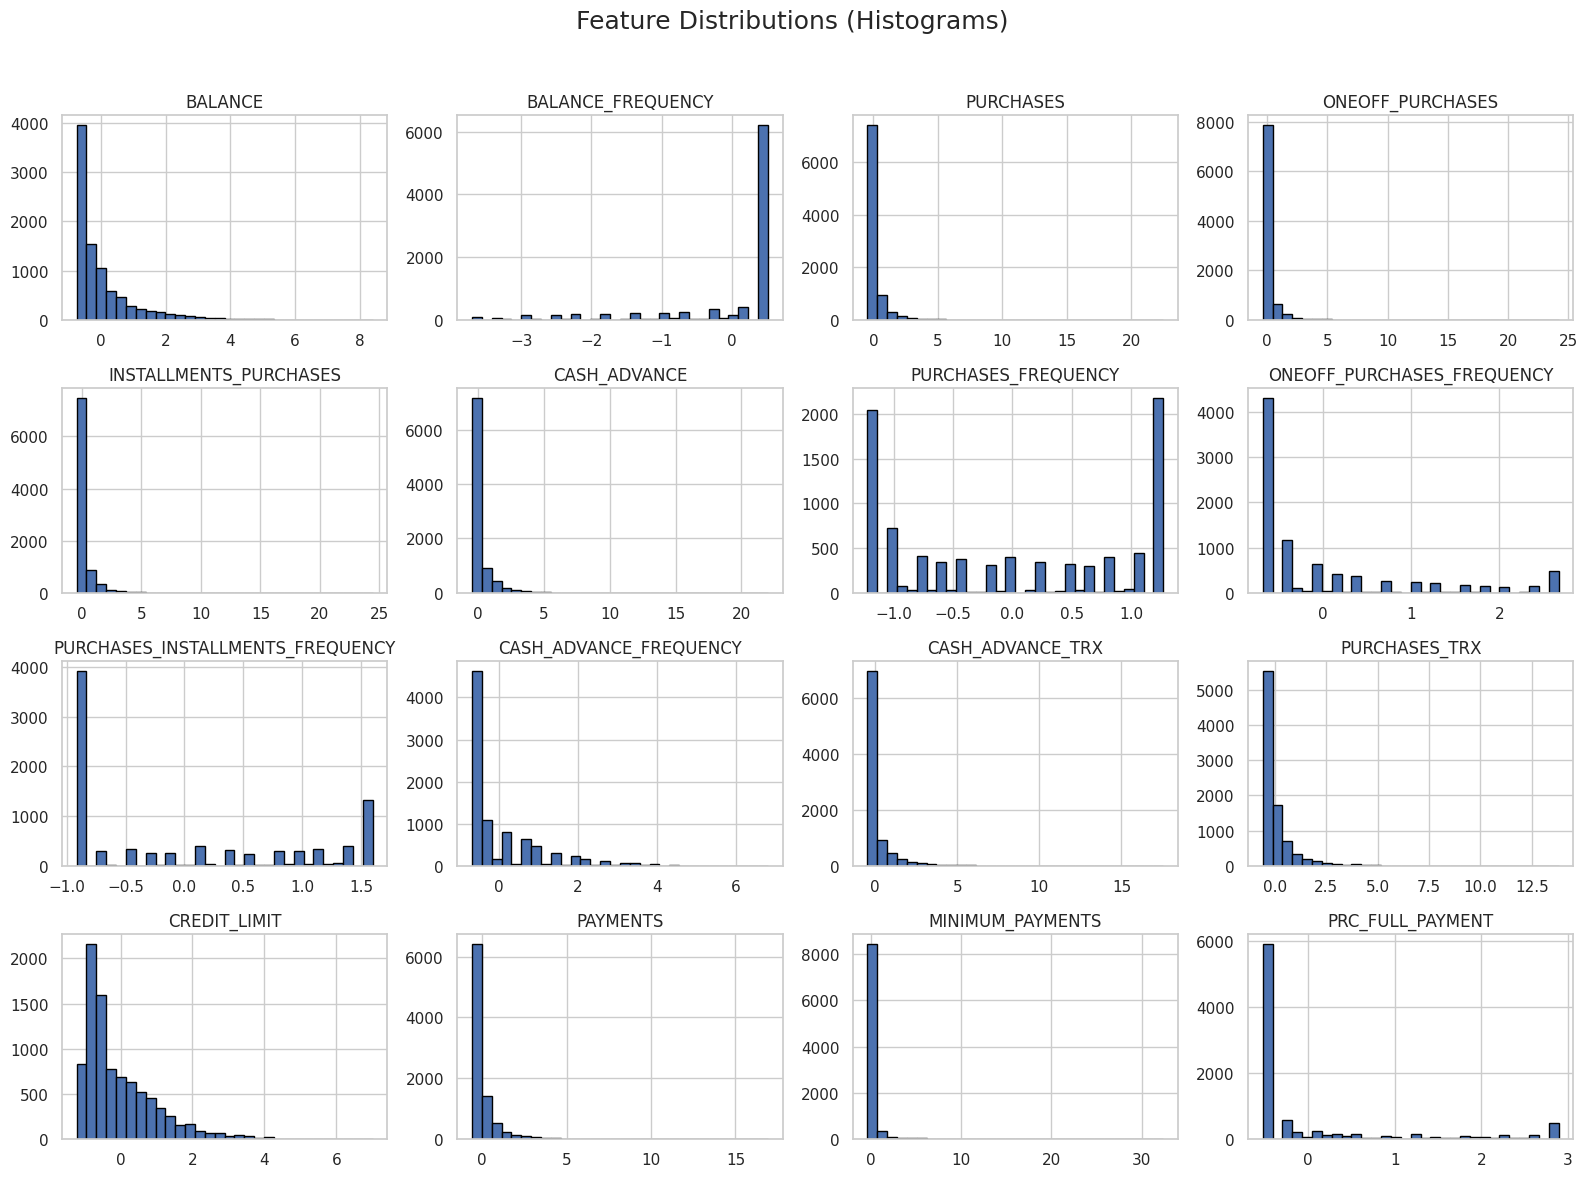

In [ ]:

# Set a general style
sns.set(style="whitegrid")

# Plot histograms for each column
df_scaled.hist(bins=30, figsize=(16, 12), edgecolor='black')
plt.suptitle('Feature Distributions (Histograms)', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust title spacing
plt.show()

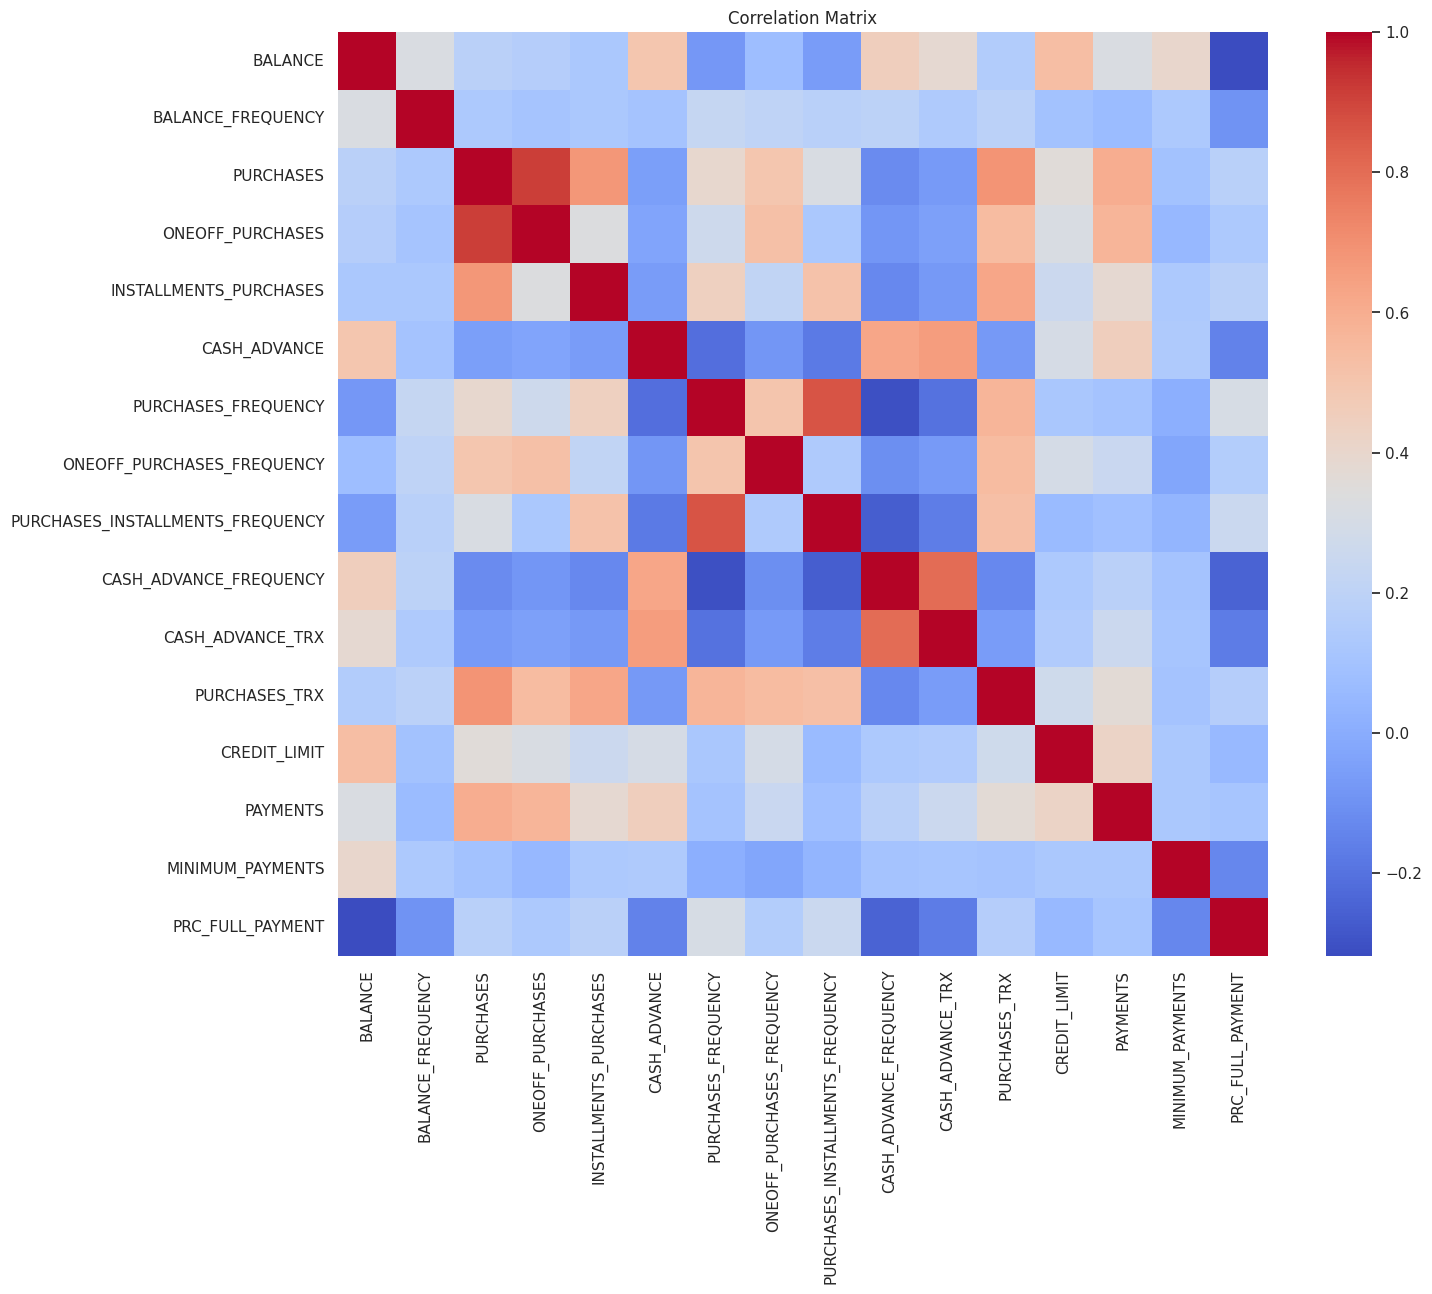

In [ ]:
# Calculate the correlation matrix, excluding the 'customerID' column
correlation_matrix = df_scaled.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#PCA

performing PCA to reduce noise and choose only the relative columns for better clustring

It appears that the optimal number of components is 10 as shown in the curve

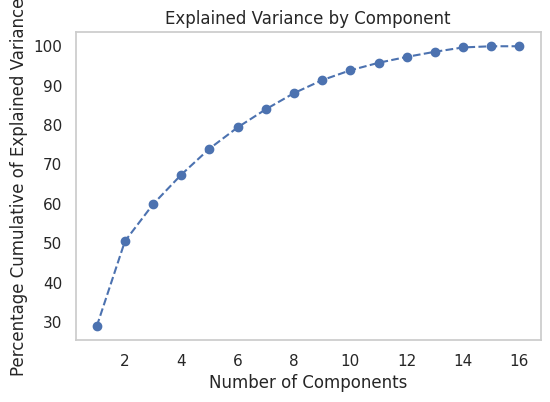

In [ ]:
pca = PCA()
pca.fit(df_scaled)
per_var = np.round(pca.explained_variance_ratio_*100, decimals = 1)

plt.figure(figsize = (6,4))
plt.plot(range(1, len(per_var)+1), per_var.cumsum(), marker = "o", linestyle = "--")
plt.grid()
plt.ylabel("Percentage Cumulative of Explained Variance")
plt.xlabel("Number of Components")
plt.title("Explained Variance by Component")
plt.show()

In [ ]:
pca = PCA(n_components = 10)
pca.fit(df_scaled)

PCA(n_components=10)

In [ ]:
scores_pca = pca.transform(df_scaled)

# Elbow Method

Calculating the WCSS needed for the elbow method

It apprears theat the elbow is shown at 7 clusters

In [ ]:
WCSS = []

for i in range(1,30):
  kmeans_pca = KMeans(n_clusters = i, init = "k-means++", random_state = 42)
  kmeans_pca.fit(scores_pca)
  WCSS.append(kmeans_pca.inertia_)

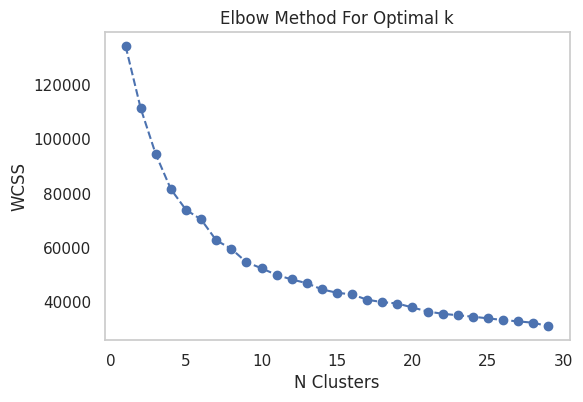

In [ ]:
plt.figure(figsize = (6,4))
plt.plot(range(1,30), WCSS, marker = "o", linestyle = "--")
plt.grid()
plt.title('Elbow Method For Optimal k')
plt.ylabel("WCSS")
plt.xlabel("N Clusters")
plt.show()

#Silhouette method

It also appears that the peak of the curve is at 7 clusteres

*even though the first point has the highest peak, it is recommended to ignore the first jump and count on the very next highest peak

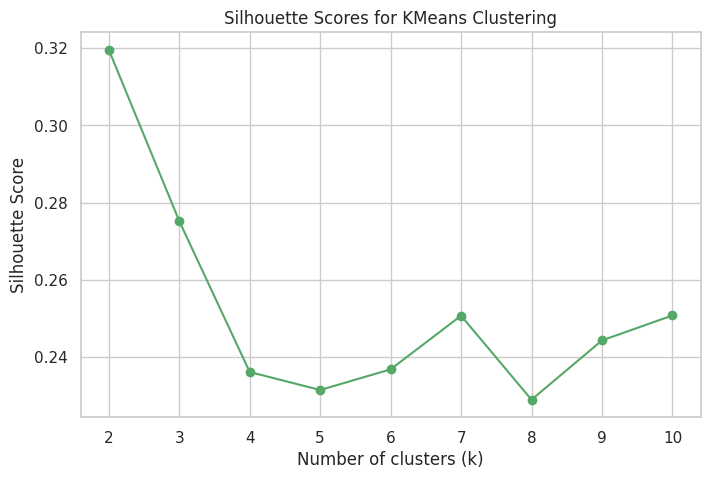

In [ ]:
sil_scores = []

K = range(2, 11) # Start the range of k from 2

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scores_pca)
    sil_scores.append(silhouette_score(scores_pca, labels))

plt.figure(figsize=(8, 5))
plt.plot(K, sil_scores, 'go-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for KMeans Clustering')
plt.show()

#Hierarchical clustering:

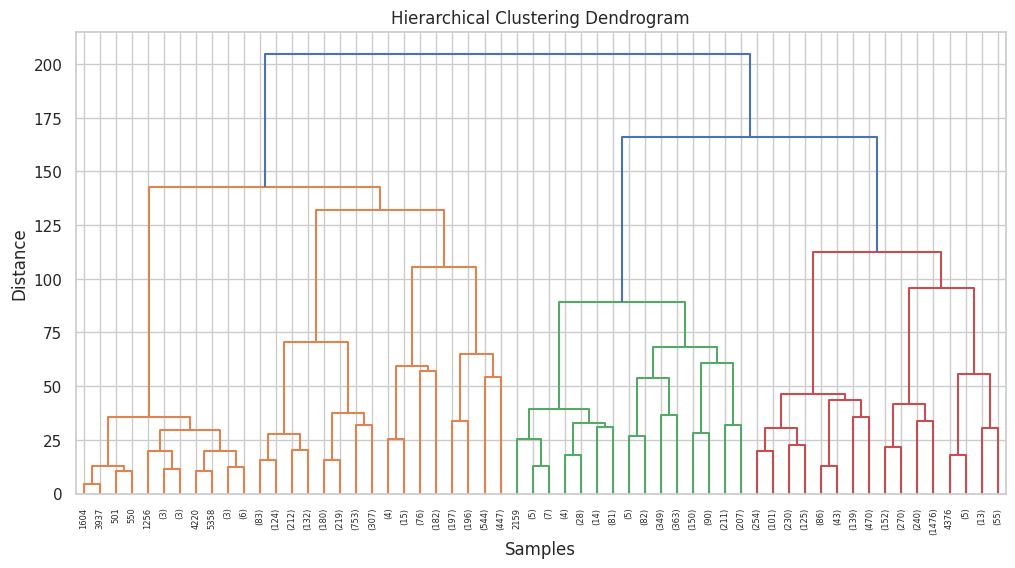

In [ ]:

linked = linkage(scores_pca, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

#Applying Kmeans algorithm:

In [ ]:
from sklearn.cluster import KMeans

k7 = KMeans(n_clusters=7, random_state=200).fit(scores_pca)

labels_7 = k7.labels_

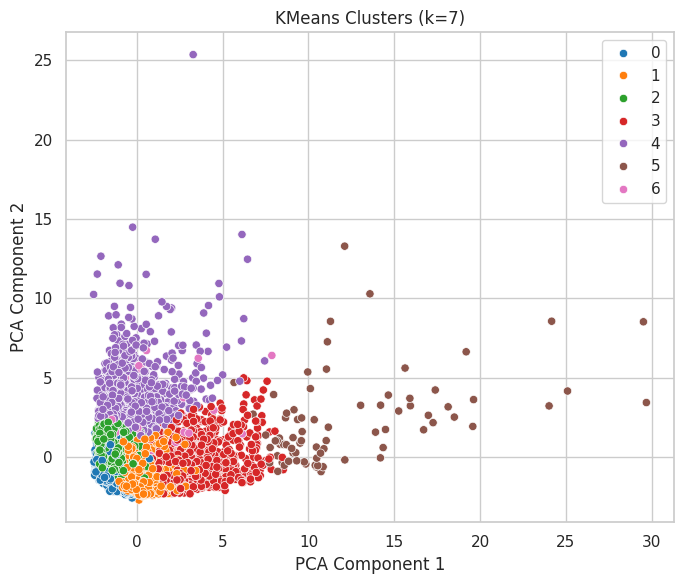

In [ ]:
fig, axes = plt.subplots(figsize=(7,6))


# Plot for k=7
sns.scatterplot(x=scores_pca[:,0], y=scores_pca[:,1], hue=labels_7, palette='tab10', axes=axes, legend='full')

axes.set_title("KMeans Clusters (k=7)")
axes.set_xlabel("PCA Component 1")
axes.set_ylabel("PCA Component 2")

plt.tight_layout()
plt.show()

#Applying BDSCAN algorithm:

This code is to help determine the best value for the eps, which is shown at the elbow of the curve, which in this case is 2 - 2.5

In [ ]:
# Set min_samples for DBSCAN
min_samples = 5

# Fit nearest neighbors model
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(scores_pca)

# Find distances to k nearest neighbors for each point
distances, indices = neighbors_fit.kneighbors(scores_pca)

# Get the distances to the k-th nearest neighbor for each point
k_distances = np.sort(distances[:, -1])  # sort ascending


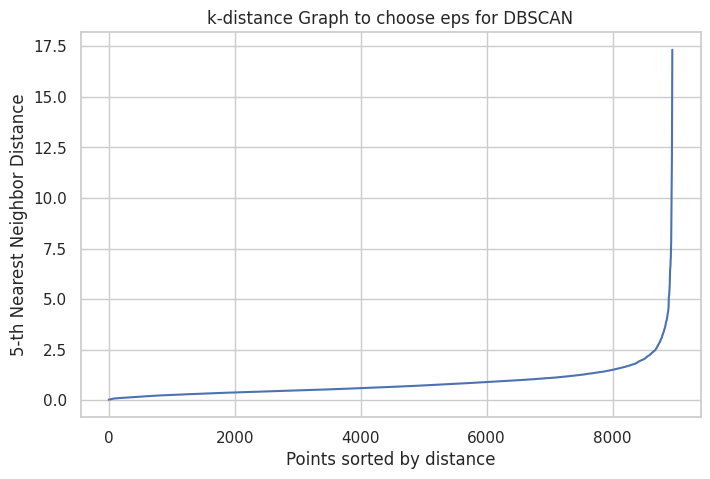

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(k_distances)
plt.xlabel('Points sorted by distance')
plt.ylabel(f'{min_samples}-th Nearest Neighbor Distance')
plt.title('k-distance Graph to choose eps for DBSCAN')
plt.grid(True)
plt.show()


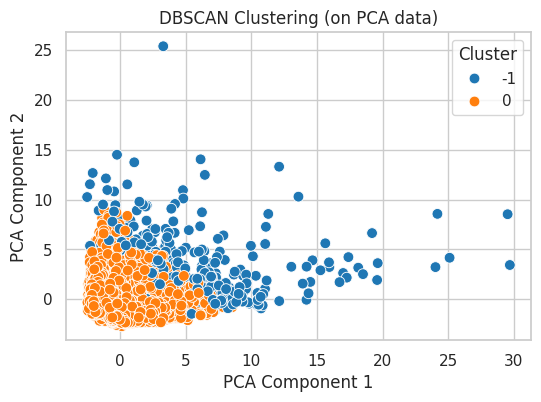

In [ ]:
# Apply DBSCAN on the PCA-reduced data
dbscan = DBSCAN(eps=2, min_samples=5)
db_labels = dbscan.fit_predict(scores_pca)

# Plot the DBSCAN clustering results
plt.figure(figsize=(6,4))
sns.scatterplot(x=scores_pca[:, 0], y=scores_pca[:, 1], hue=db_labels, palette='tab10', s=60)
plt.title("DBSCAN Clustering (on PCA data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


#Agglomerative Hierarchical Clustering




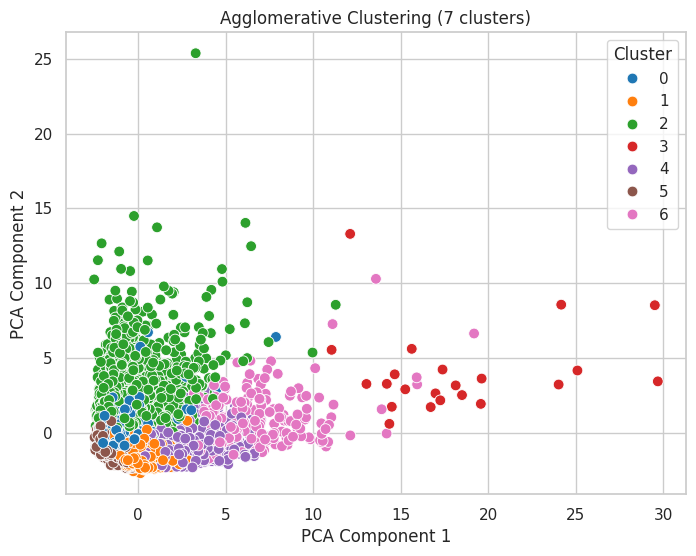

In [ ]:
# Create Agglomerative Clustering model
agg = AgglomerativeClustering(n_clusters=7, linkage='ward')

# Fit and predict cluster labels
agg_labels = agg.fit_predict(scores_pca)

# Visualize clusters in 2D using first two PCA components
plt.figure(figsize=(8,6))
sns.scatterplot(x=scores_pca[:, 0], y=scores_pca[:, 1], hue=agg_labels, palette='tab10', s=60)
plt.title('Agglomerative Clustering (7 clusters)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


#Comparing Silhouette scores

In [ ]:
#Kmeans score
silhouette_kmeans = silhouette_score(scores_pca, labels_7)

#DBSCAN score
mask = db_labels != -1
if len(where(mask)[0]) > 1 and len(set(db_labels[mask])) > 1:
  silhouette_dbscan = silhouette_score(scores_pca[mask], db_labels[mask])
else:
  silhouette_dbscan = "Could not calculate (no clusters found)"


#Agglomerative score
silhouette_agg = silhouette_score(scores_pca, agg_labels)

print(f"Silhouette Scores:\nKMeans: {silhouette_kmeans:.3f}\nDBSCAN: {silhouette_dbscan}\nAgglomerative: {silhouette_agg:.3f}")

Silhouette Scores:
KMeans: 0.251
DBSCAN: Could not calculate (no clusters found)
Agglomerative: 0.184


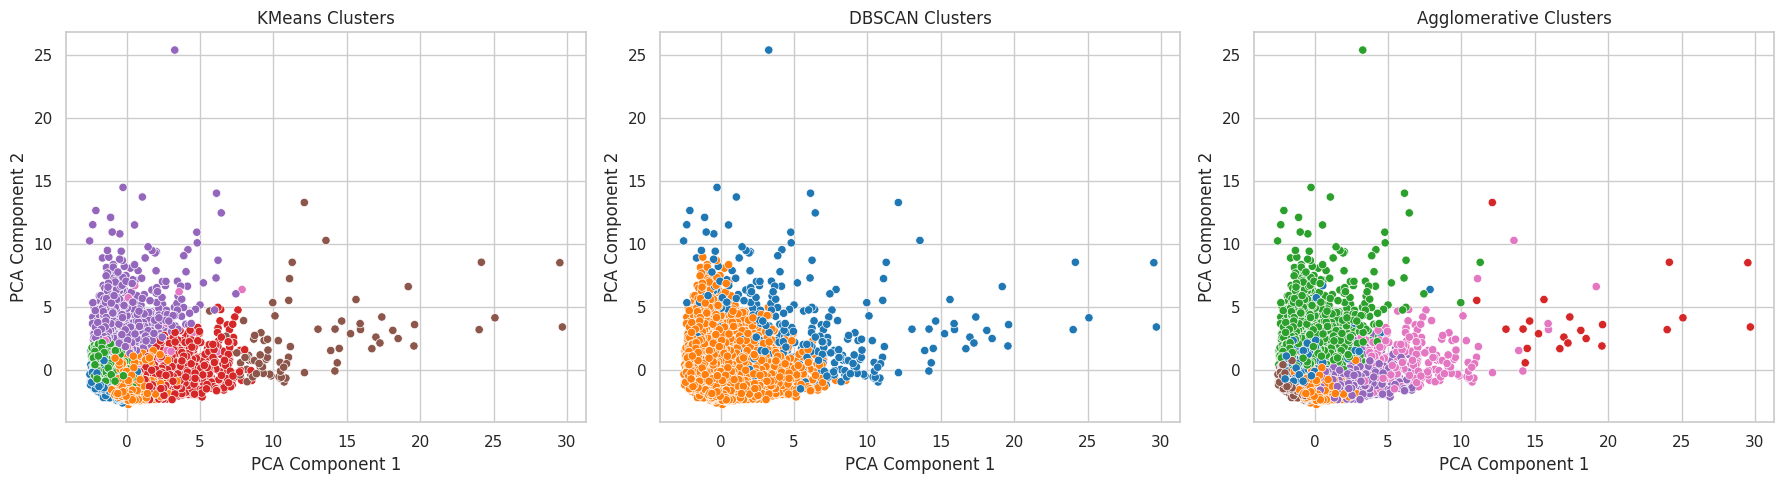

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(x=scores_pca[:,0], y=scores_pca[:,1], hue=labels_7, palette='tab10', ax=axes[0], legend=False)
axes[0].set_title("KMeans Clusters")

sns.scatterplot(x=scores_pca[:,0], y=scores_pca[:,1], hue=db_labels, palette='tab10', ax=axes[1], legend=False)
axes[1].set_title("DBSCAN Clusters")

sns.scatterplot(x=scores_pca[:,0], y=scores_pca[:,1], hue=agg_labels, palette='tab10', ax=axes[2], legend=False)
axes[2].set_title("Agglomerative Clusters")

for ax in axes:
    ax.set_xlabel("PCA Component 1")
    ax.set_ylabel("PCA Component 2")

plt.tight_layout()
plt.show()
